In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

symbol = "set50"
df = pd.read_csv("../data/"+symbol+".csv", index_col="Date", parse_dates=True)
start_date = "2000-01-01"
end_date = "2019-01-10"
df = df[start_date:end_date]

In [32]:
df_c = df['Close']

Text(0.5,1,'set50by www.toro.in.th')

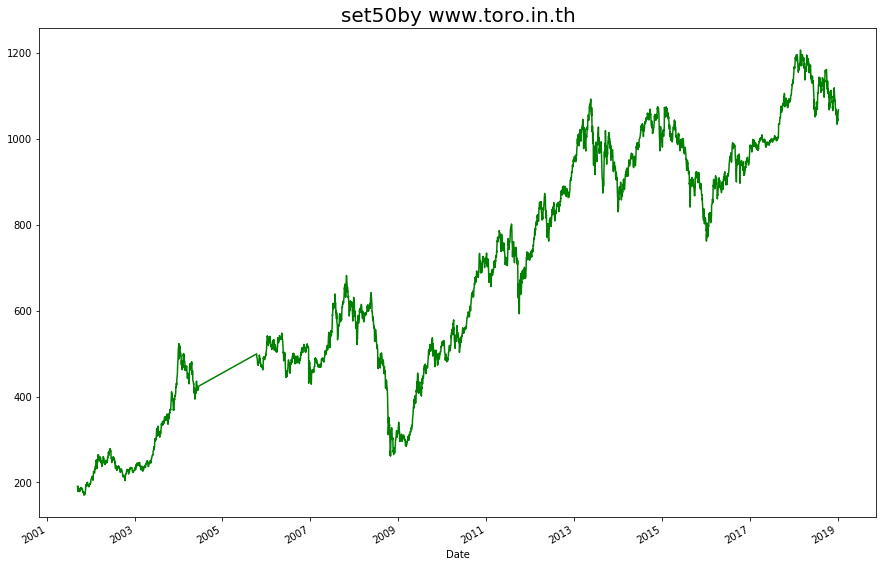

In [33]:
fig, ax = plt.subplots(figsize=(15,10))
df_c.plot(color='g')
plt.title(symbol + "by www.toro.in.th", fontsize=20)

In [34]:
first_open = df['Open'].iloc[0]
first_open

203.8

In [35]:
last_close = df['Close'].iloc[-1]
last_close

1067.2

In [36]:
last_close - first_open

863.4000000000001

In [37]:
df['Daily Change'] = pd.Series(df['Close'] - df['Open'])

In [38]:
df['Daily Change'].sum()

-1443.4500000000048

In [39]:
np.std(df['Daily Change'])

6.921771172153342

In [40]:
df['Over Night'] = pd.Series(df['Open'] - df['Close'].shift(1))
np.std(df['Over Night'])

4.899715091266674

In [41]:
df[df['Daily Change'] < 0]['Daily Change'].mean()

-5.216787667826948

In [42]:
df[df['Over Night'] < 0]['Over Night'].mean()

-3.482171232876707

In [43]:
daily_rtn = ((df['Close'] - df['Close'].shift(1))/df['Close'].shift(1))*100
id_rtn = ((df['Close'] - df['Open']) / df['Open'])*100
on_rtn = ((df['Open'] - df['Close'].shift(1)) / df['Close'].shift(1))*100

In [44]:
def get_stats(s, n=252):
    s = s.dropna()
    wins = len(s[s>0])
    losses = len(s[s<0])
    evens = len(s[s==0])
    mean_w = round(s[s>0].mean(),3)
    mean_l = round(s[s<0].mean(),3)
    win_r = round(wins/losses, 3)
    mean_trd = round(s.mean(),3)
    sd = round(np.std(s),3)
    max_l = round(s.min(),3)
    max_w = round(s.max(),3)
    sharpe_r = round((s.mean()/np.std(s))*np.sqrt(n),4)
    cnt = len(s)
    print('Trades:',cnt,\
        '\nWins:', wins,\
        '\nLosses:', losses,\
        '\nBreakeven:', evens,\
        '\nWin/Loss Ratio:',win_r,\
        '\nMean Win:',mean_w,\
        '\nMean Loss:',mean_l,\
        '\nMean:',mean_trd,\
        '\nStd Dev:',sd,\
        '\nMax Loss:',max_l,\
        '\nMax Win:',max_w,\
        '\nSharpe Ratio:',sharpe_r)

In [45]:
get_stats(daily_rtn)

Trades: 3894 
Wins: 2015 
Losses: 1870 
Breakeven: 9 
Win/Loss Ratio: 1.078 
Mean Win: 1.002 
Mean Loss: -0.966 
Mean: 0.055 
Std Dev: 1.439 
Max Loss: -15.828 
Max Win: 17.745 
Sharpe Ratio: 0.6015


In [46]:
get_stats(id_rtn)

Trades: 3895 
Wins: 1872 
Losses: 2011 
Breakeven: 12 
Win/Loss Ratio: 0.931 
Mean Win: 0.809 
Mean Loss: -0.847 
Mean: -0.049 
Std Dev: 1.181 
Max Loss: -14.543 
Max Win: 8.852 
Sharpe Ratio: -0.6521


In [47]:
get_stats(on_rtn)

Trades: 3894 
Wins: 2385 
Losses: 1460 
Breakeven: 49 
Win/Loss Ratio: 1.634 
Mean Win: 0.495 
Mean Loss: -0.539 
Mean: 0.101 
Std Dev: 0.823 
Max Loss: -9.436 
Max Win: 18.149 
Sharpe Ratio: 1.9585
